# Modules

In [9]:
import spectral_analysis as sa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# f

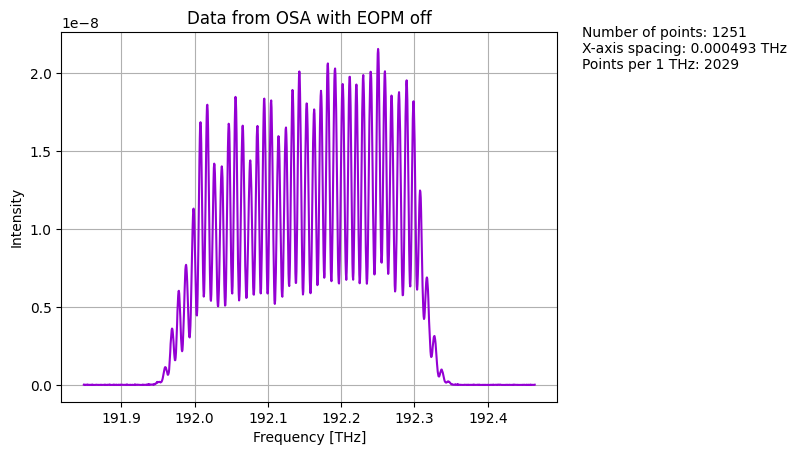

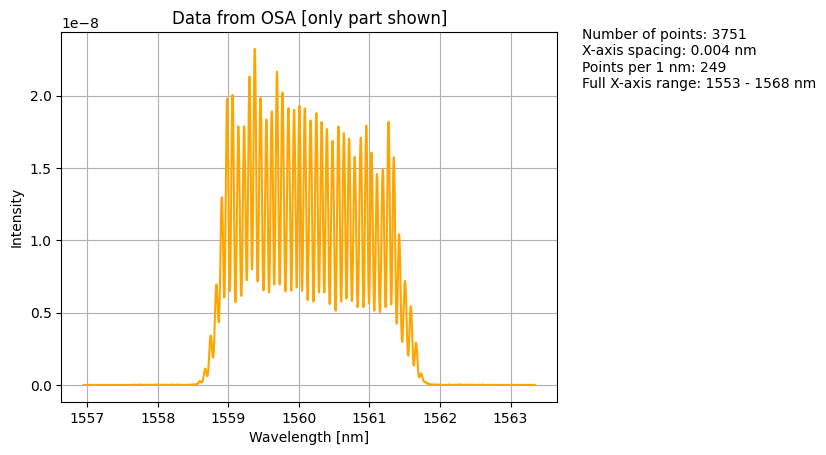

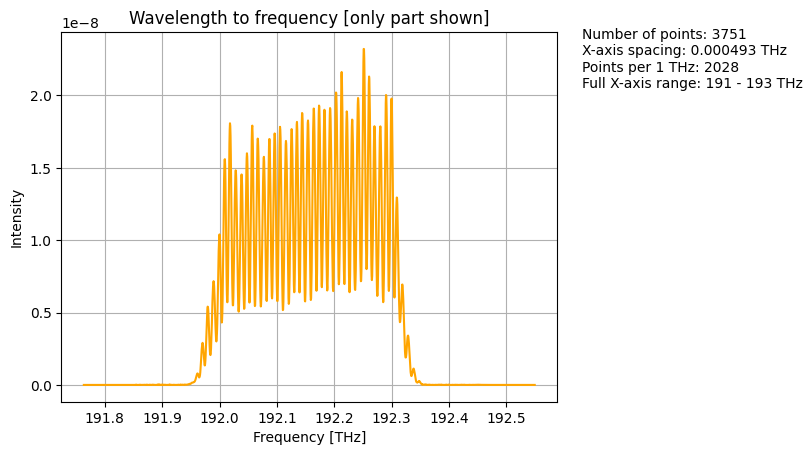

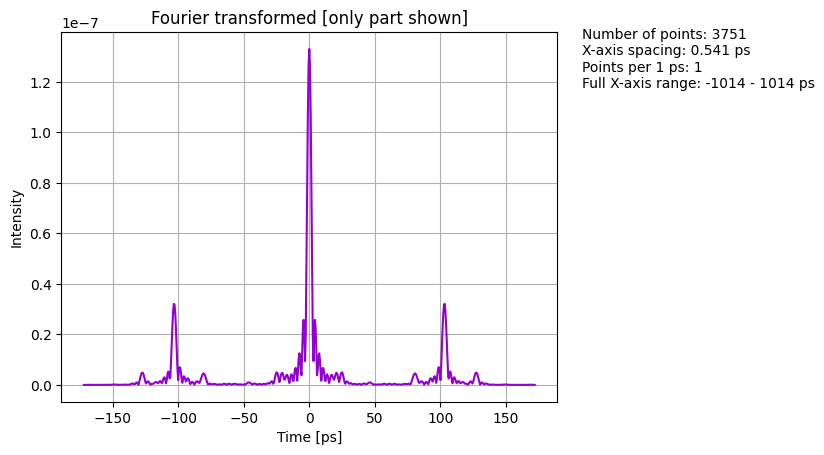

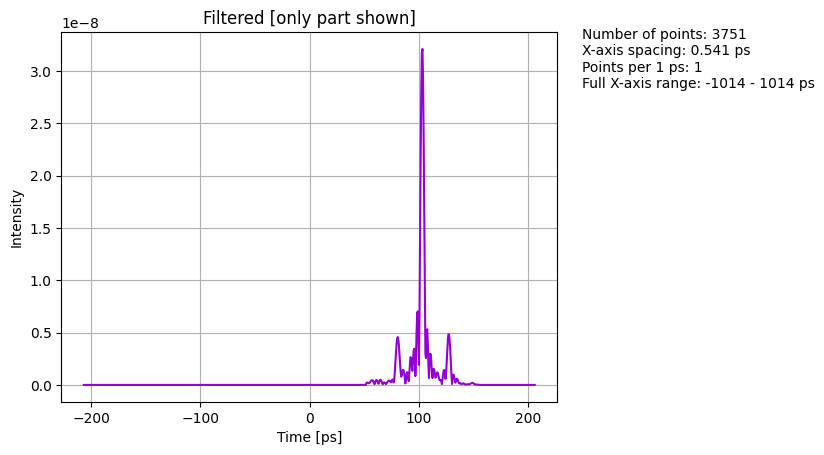

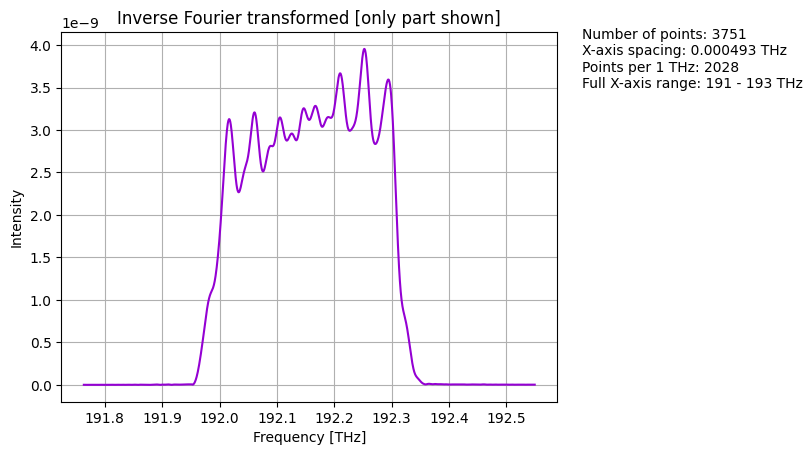

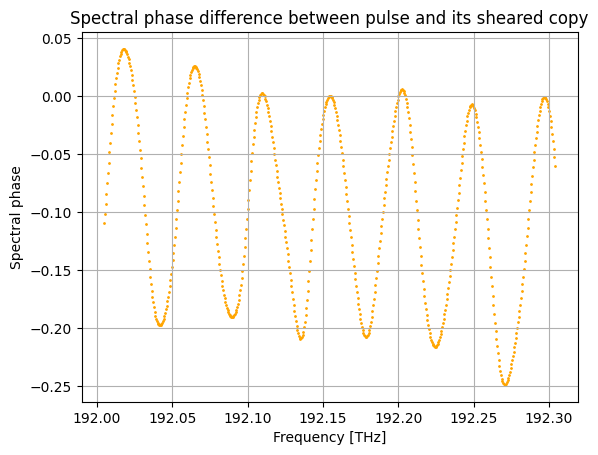

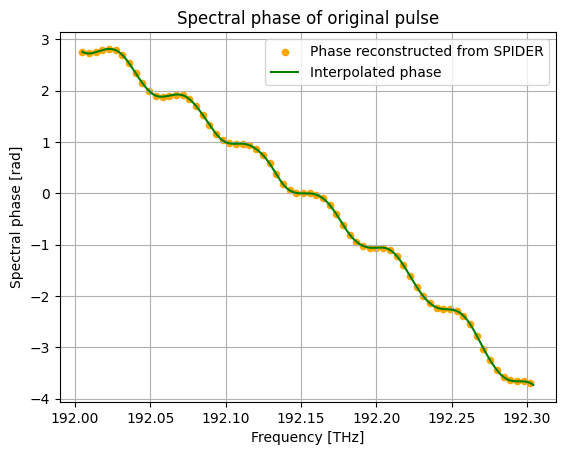

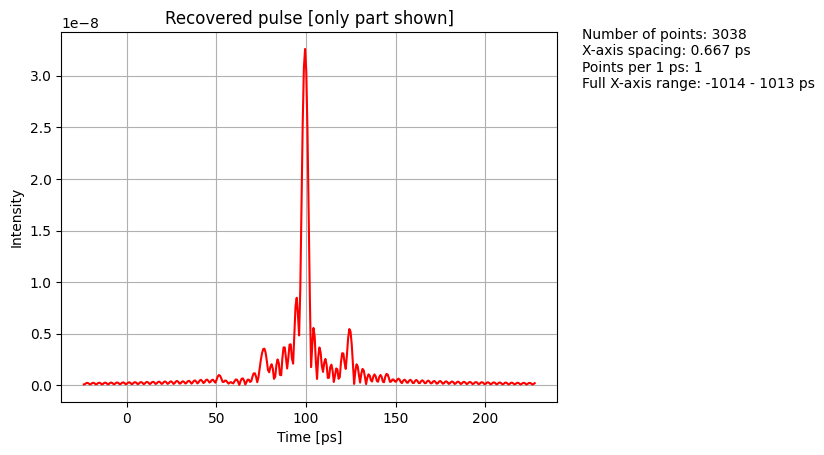

In [14]:
start = 192
end = 192.3

no_fiber_osa_temp = pd.read_csv("data/10uW_temp.csv", skiprows = 2)
def to_spectrum(df):
    X = df.values[:, 0]
    Y = df.values[:, 1]
    return sa.spectrum(X, Y, "wl", "intensity")

no_fiber_osa_temp = to_spectrum(no_fiber_osa_temp)
no_fiber_osa_temp.wl_to_freq()

sa.plot(no_fiber_osa_temp, title = "Data from OSA with EOPM off")

pulse_10 = sa.spider(phase_spectrum = "data/10uW.csv",
        temporal_spectrum = "data/10uW_temp.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        vis_param = 0.5,
        what_to_return = "phase",
        plot_steps = True,
        plot_phase = True,
        plot_pulse = True)[1]

pulse_30 = sa.spider(phase_spectrum = "data/30uW.csv",
        temporal_spectrum = "data/30uW_temp.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

pulse_50 = sa.spider(phase_spectrum = "data/50uW.csv",
        temporal_spectrum = "data/50uW_temp.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

pulse_70 = sa.spider(phase_spectrum = "data/70uW.csv",
        temporal_spectrum = "data/70uW_temp.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

pulse_90 = sa.spider(phase_spectrum = "data/90uW.csv",
        temporal_spectrum = "data/90uW_temp.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

pulse_110 = sa.spider(phase_spectrum = "data/110uW.csv",
        temporal_spectrum = "data/110uW_temp.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

pulse_140 = sa.spider(phase_spectrum = "data/140uW.csv",
        temporal_spectrum = "data/140uW_temp.csv",
        shear = None,
        intensity_spectrum = None,
        phase_borders = [start, end],
        what_to_return = "phase",
        vis_param = 0.5,
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False)[1]

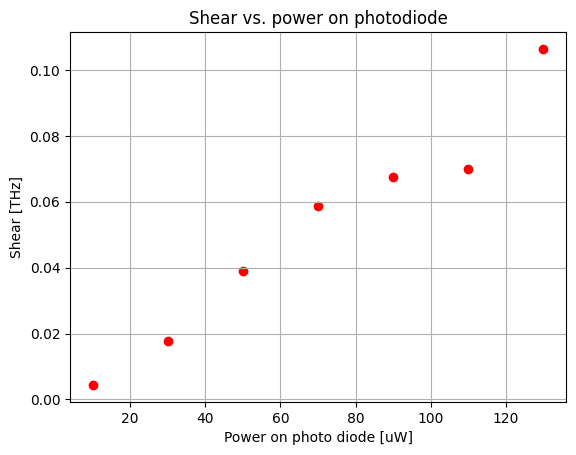

In [15]:
shears = np.array([0.0044, 0.0177, 0.0389, 0.0587, 0.0675, 0.07, 0.1064])
PD_power = np.array([10,30,50,70,90,110,130])
plt.scatter(PD_power, shears, color = "red")
plt.title("Shear vs. power on photodiode")
plt.xlabel("Power on photo diode [uW]")
plt.ylabel("Shear [THz]")
plt.grid()
plt.show()

C:\Users\rewas\AppData\Local\Temp\ipykernel_27304\1438287455.py:17: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


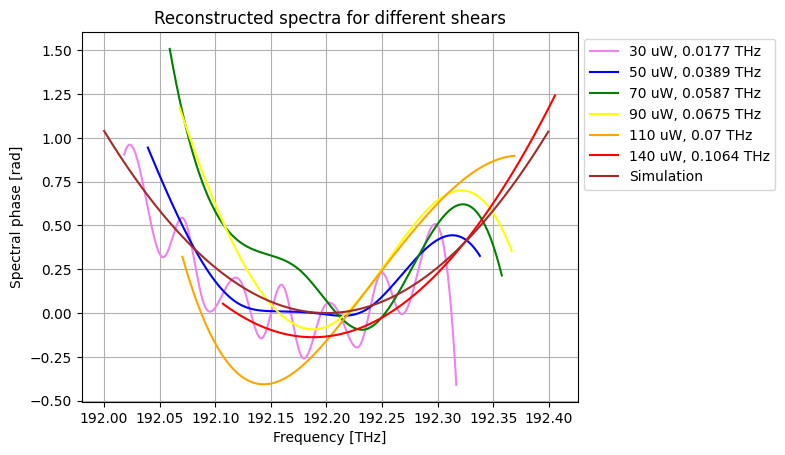

In [18]:
shears = np.array([0.0044, 0.0177, 0.0389, 0.0587, 0.0675, 0.07, 0.1064])

pulse_10.Y *= (-1)
pulse_30.Y *= (-1)
pulse_50.Y *= (-1)
pulse_70.Y *= (-1)
pulse_90.Y *= (-1)
pulse_110.Y *= (-1)
pulse_140.Y *= (-1)

def phase(f, f_mean, fiber_length):
    l_0 = 1560
    c = 3*1e8
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

X = np.linspace(192, 192.4, 1000)
Y = phase(X, np.mean(X), 60)

sim_pulse = sa.spectrum(X, Y, "freq", "phase")

#sa.compare_plots([pulse_10, pulse_30, pulse_50, pulse_70, pulse_90, pulse_110, pulse_140, sim_pulse],
#                 legend = (["10 uW", "30 uW", "50 uW", "70 uW", "90 uW", "110 uW", "140 uW", "Simulation"]))


sa.compare_plots([pulse_30, pulse_50, pulse_70, pulse_90, pulse_110, pulse_140, sim_pulse],
                 legend = ["30 uW, 0.0177 THz", "50 uW, 0.0389 THz", "70 uW, 0.0587 THz", "90 uW, 0.0675 THz", "110 uW, 0.07 THz", "140 uW, 0.1064 THz", "Simulation"],
                 title = "Reconstructed spectra for different shears")